In [93]:
import capstone_eval as ce
from bs4 import BeautifulSoup as bs
import numpy as np
from PIL import Image

In [94]:
import warnings
warnings.simplefilter("ignore") # ignores the warning when diving by 0
                                # some of the images are all black
                                # i.e. all pixels have grayscale level = 0
                                # so mean of the intensity is also 0
                                # This affects those metrics where relative error
                                # of some form is placed in the denominator

In [95]:
def extract_imgs(directory):
    soup = bs(open(directory + '/index.html'), "html.parser")
    image_tags = soup.findAll('img')
    inp, out, targ = [], [], []
    for image_tag in range(0,len(image_tags),3):
        inp.append(directory + '/' + image_tags[image_tag].get('src'))
        out.append(directory + '/' + image_tags[image_tag+1].get('src'))
        targ.append(directory + '/' + image_tags[image_tag+2].get('src'))
    return inp, out, targ

In [96]:
pix2pix_run_dir = '/home/satyam/Desktop/CAPSTONE/DATA/run1'
test_out = pix2pix_run_dir + '/test_out'
train_out = pix2pix_run_dir + '/train_out'

In [97]:
def calculate_rmse(prediction_imgs, target_imgs, channel):
    rmse_list = [];
    for i in range(0,len(target_imgs)):
        rmse_list.append(ce.rmse_dir(prediction_imgs[i], target_imgs[i], channel))
    return rmse_list

In [98]:
def calculate_mbe(prediction_imgs, target_imgs, channel):
    mbe_list = [];
    for i in range(0,len(target_imgs)):
        mbe_list.append(ce.mbe_dir(prediction_imgs[i], target_imgs[i], channel))
    return mbe_list

In [99]:
def calculate_cv(prediction_imgs, target_imgs, channel):
    cv_list = [];
    for i in range(0,len(target_imgs)):
        cv_list.append(ce.cv_rmse_dir(prediction_imgs[i], target_imgs[i], channel))
    return cv_list

# Run_1 : TRAIN_OUT 

## Comparing ground truth (trained image) vs generated images

In [100]:
input_images_links, output_images_links, target_images_links = extract_imgs(train_out)

### RMSE measurements for RUN1 

In [101]:
np.mean(calculate_rmse(output_images_links, target_images_links, 'r'))

38.20593902815044

In [102]:
np.mean(calculate_rmse(output_images_links, target_images_links, 'b'))

38.2223061423156

In [103]:
np.mean(calculate_rmse(output_images_links, target_images_links, 'g'))

38.221816196024996

In [104]:
np.mean(calculate_rmse(output_images_links, target_images_links, 'gray'))

38.194808057372114

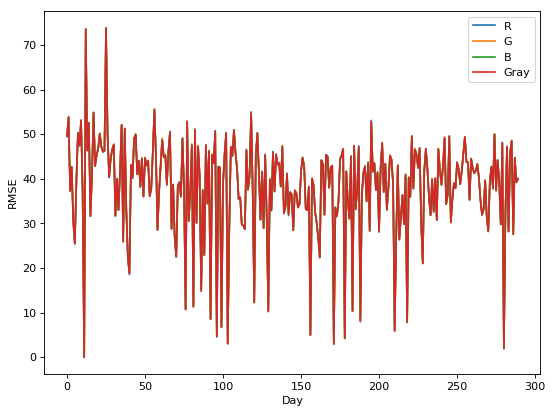

In [105]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

plt.plot(calculate_rmse(output_images_links, target_images_links, 'r'), label= 'R') 
plt.plot(calculate_rmse(output_images_links, target_images_links, 'b'), label= 'G') 
plt.plot(calculate_rmse(output_images_links, target_images_links, 'g'), label= 'B') 
plt.plot(calculate_rmse(output_images_links, target_images_links, 'gray'), label= 'Gray') 

plt.ylabel('RMSE')
plt.xlabel('Day')
plt.legend()
plt.show()

### Mean Bias Error for RUN

In [106]:
np.mean(calculate_mbe(output_images_links, target_images_links, 'r'))

-inf

In [107]:
np.mean(calculate_mbe(output_images_links, target_images_links, 'b'))

-inf

In [108]:
np.mean(calculate_mbe(output_images_links, target_images_links, 'r'))

-inf

In [109]:
np.mean(calculate_mbe(output_images_links, target_images_links, 'r'))

-inf

In [110]:
np.mean(calculate_mbe(output_images_links, target_images_links, 'gray'))

-inf

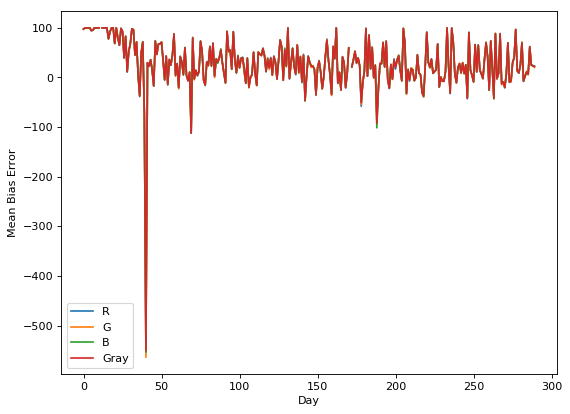

In [111]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

plt.plot(calculate_mbe(output_images_links, target_images_links, 'r'), label= 'R') 
plt.plot(calculate_mbe(output_images_links, target_images_links, 'b'), label= 'G') 
plt.plot(calculate_mbe(output_images_links, target_images_links, 'g'), label= 'B') 
plt.plot(calculate_mbe(output_images_links, target_images_links, 'gray'), label= 'Gray') 


plt.ylabel('Mean Bias Error')
plt.xlabel('Day')
plt.legend()
plt.show()

### Coefficient of Variation

In [112]:
np.mean(calculate_cv(output_images_links, target_images_links, 'r'))

inf

In [113]:
np.mean(calculate_cv(output_images_links, target_images_links, 'g'))

nan

In [114]:
np.mean(calculate_cv(output_images_links, target_images_links, 'b'))

inf

In [115]:
np.mean(calculate_cv(output_images_links, target_images_links, 'gray'))

inf

### Comparing the metrics

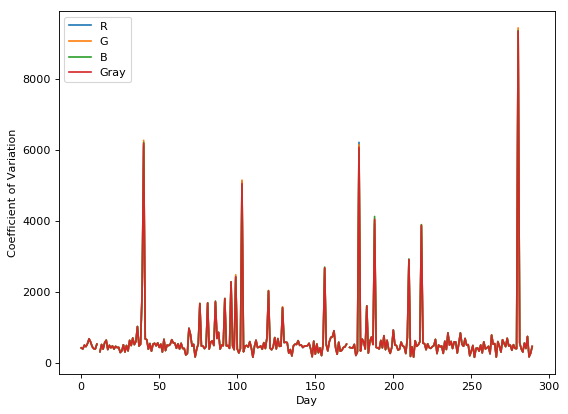

In [116]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

plt.plot(calculate_cv(output_images_links, target_images_links, 'r'), label= 'R') 
plt.plot(calculate_cv(output_images_links, target_images_links, 'b'), label= 'G') 
plt.plot(calculate_cv(output_images_links, target_images_links, 'g'), label= 'B') 
plt.plot(calculate_cv(output_images_links, target_images_links, 'gray'), label= 'Gray') 

plt.ylabel('Coefficient of Variation')
plt.xlabel('Day')
plt.legend()
plt.show()

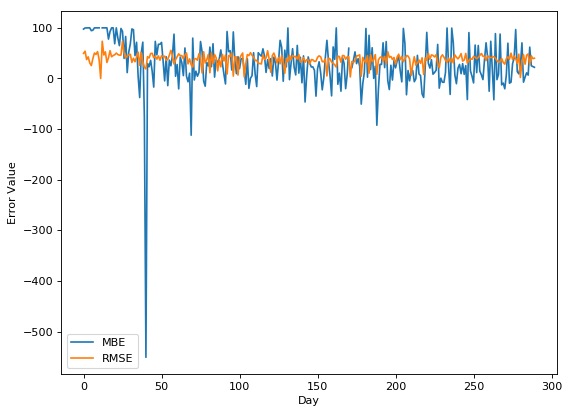

In [117]:
import matplotlib.pyplot as plt
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(calculate_mbe(output_images_links, target_images_links, 'gray'), label="MBE")
plt.plot(calculate_rmse(output_images_links, target_images_links, 'gray'), label="RMSE") 
#plt.plot(calculate_cv(output_images_links, target_images_links, 'gray'), label= 'Coefficient of Variation') 

plt.ylabel('Error Value')
plt.xlabel('Day')
plt.legend()

plt.show()

# Run_1 : TEST_OUT

## Comparing ground truth (not used in training, model has not this before) vs generated images

In [118]:
input_images_links, output_images_links, target_images_links = extract_imgs(test_out)

In [119]:
# RMSE measurements for RUN1 

In [120]:
np.mean(calculate_rmse(output_images_links, target_images_links, 'r'))

35.31605979422774

In [121]:
np.mean(calculate_rmse(output_images_links, target_images_links, 'b'))

35.48482542734958

In [122]:
np.mean(calculate_rmse(output_images_links, target_images_links, 'g'))

35.360460621116175

In [123]:
np.mean(calculate_rmse(output_images_links, target_images_links, 'gray'))

35.33886156685698

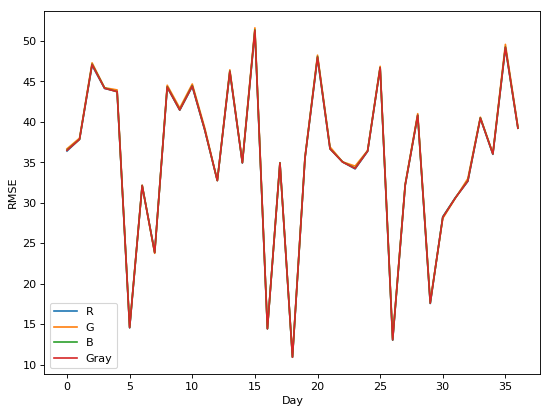

In [124]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

plt.plot(calculate_rmse(output_images_links, target_images_links, 'r'), label= 'R') 
plt.plot(calculate_rmse(output_images_links, target_images_links, 'b'), label= 'G') 
plt.plot(calculate_rmse(output_images_links, target_images_links, 'g'), label= 'B') 
plt.plot(calculate_rmse(output_images_links, target_images_links, 'gray'), label= 'Gray') 

plt.ylabel('RMSE')
plt.xlabel('Day')
plt.legend()
plt.show()

In [125]:
# Mean Bias Error for RUN

In [126]:
np.mean(calculate_mbe(output_images_links, target_images_links, 'r'))

-inf

In [127]:
np.mean(calculate_mbe(output_images_links, target_images_links, 'b'))

-inf

In [128]:
np.mean(calculate_mbe(output_images_links, target_images_links, 'g'))

-inf

In [129]:
np.mean(calculate_mbe(output_images_links, target_images_links, 'gray'))

-inf

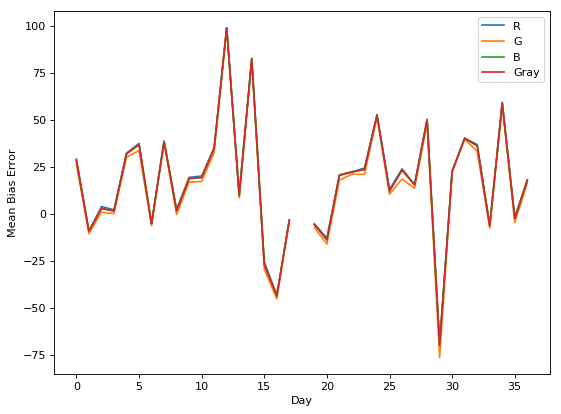

In [130]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

plt.plot(calculate_mbe(output_images_links, target_images_links, 'r'), label= 'R') 
plt.plot(calculate_mbe(output_images_links, target_images_links, 'b'), label= 'G') 
plt.plot(calculate_mbe(output_images_links, target_images_links, 'g'), label= 'B') 
plt.plot(calculate_mbe(output_images_links, target_images_links, 'gray'), label= 'Gray') 


plt.ylabel('Mean Bias Error')
plt.xlabel('Day')
plt.legend()
plt.show()

In [131]:
# Coefficient of Variation

In [132]:
np.mean(calculate_cv(output_images_links, target_images_links, 'r'))

inf

In [133]:
np.mean(calculate_cv(output_images_links, target_images_links, 'b'))

inf

In [134]:
np.mean(calculate_cv(output_images_links, target_images_links, 'g'))

inf

In [135]:
np.mean(calculate_cv(output_images_links, target_images_links, 'gray'))

inf

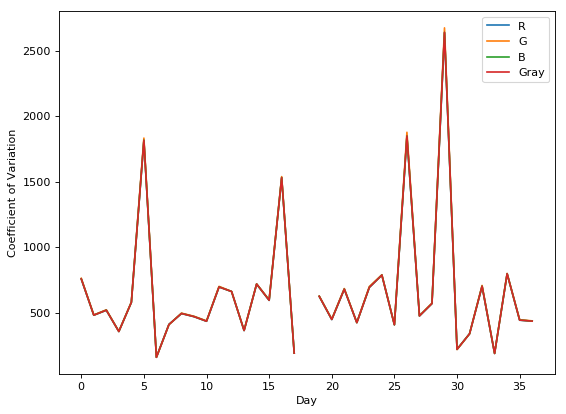

In [136]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

plt.plot(calculate_cv(output_images_links, target_images_links, 'r'), label= 'R') 
plt.plot(calculate_cv(output_images_links, target_images_links, 'b'), label= 'G') 
plt.plot(calculate_cv(output_images_links, target_images_links, 'g'), label= 'B') 
plt.plot(calculate_cv(output_images_links, target_images_links, 'gray'), label= 'Gray') 

plt.ylabel('Coefficient of Variation')
plt.xlabel('Day')
plt.legend()
plt.show()

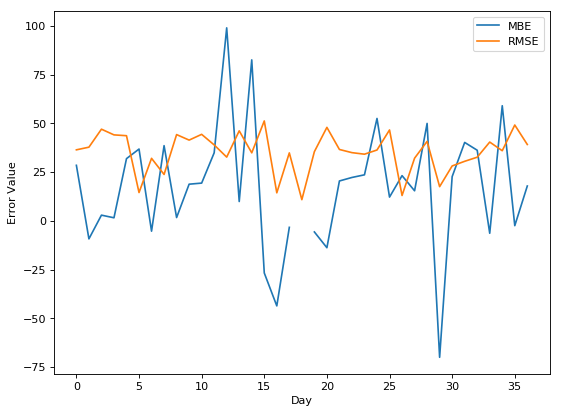

In [137]:
import matplotlib.pyplot as plt
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(calculate_mbe(output_images_links, target_images_links, 'gray'), label="MBE")
plt.plot(calculate_rmse(output_images_links, target_images_links, 'gray'), label="RMSE") 
#plt.plot(calculate_cv(output_images_links, target_images_links, 'gray'), label= 'Coefficient of Variation') 

plt.ylabel('Error Value')
plt.xlabel('Day')
plt.legend()

plt.show()